In [48]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [49]:
dataset = MNIST(root = 'data/', download = True)

In [50]:
len(dataset) # checking the lenghts of my dataset

60000

In [51]:
test_dataset = MNIST(root = 'data/',train = False)
train_dataset = MNIST(root = 'data/',train = True)
len(test_dataset), len(train_dataset)

(10000, 60000)

In [52]:
train_dataset[0] # PIL is the Python Library to work with the images

(<PIL.Image.Image image mode=L size=28x28 at 0x7FE02A167820>, 5)

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline  
# % means magic command bcs it says show my graph not like pop up

Label: 5


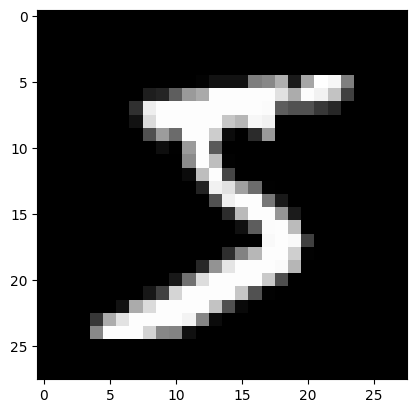

In [54]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

Label: 7


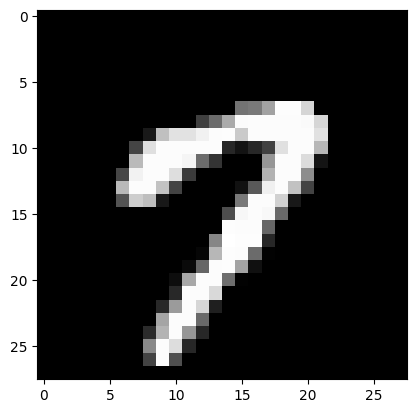

In [55]:
image, label = dataset[15]
plt.imshow(image,cmap = 'gray')
print('Label:', label)

In [56]:
import torchvision.transforms as transforms

In [57]:
dataset = MNIST(root = 'data/', download = True, transform = transforms.ToTensor())
# computer can't recognise my image so I have to convert it into tensor.  

In [58]:
img_tensor, label = dataset [0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [59]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


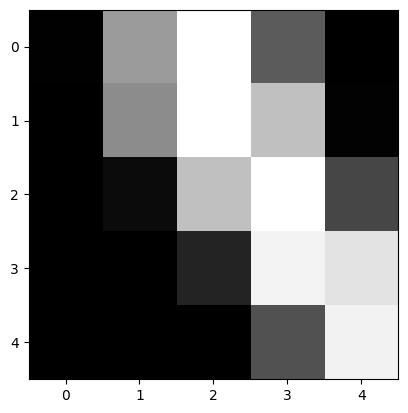

In [60]:
plt.imshow(img_tensor[0,10:15,10:15], cmap ='gray')

# **Train, Test and Validation sets**

In [61]:
import numpy as np

def split_indices(num_data, val_predict):
  n_val = int(val_predict * num_data) # val_pred : which proposion I want to take as a val. and total amount od data in train set

  indx = np.random.permutation(num_data) # create a value 0 to num_data

  return indx[n_val:], indx[:n_val]

In [62]:
train_i, validation_i = split_indices(len(dataset), val_predict=0.2) # 600000 * 0.2 = 12000

In [63]:
from traitlets.traitlets import validate
len(validation_i)

12000

In [64]:
from torch.utils.data.sampler import SubsetRandomSampler # shuffle my data
from torch.utils.data.dataloader import DataLoader

In [65]:
BATCH_SIZE = 100

# Train set/ DataLoader
train_sampler = SubsetRandomSampler(train_i)
train_dl = DataLoader(dataset, batch_size = BATCH_SIZE, sampler = train_sampler)

# Validation set/ Dataloader 
validation_sampler = SubsetRandomSampler(validation_i)
validation_dl = DataLoader(dataset, batch_size = BATCH_SIZE, sampler = validation_sampler)

# **Model IC_Linear_R**

In [66]:
import torch.nn as nn

input_size = 28 * 28 # pic size 28 * 28 and change it into vector
num_class = 10 # 10 outputs from my model

my_model = nn.Linear(input_size, num_class)

print(my_model.weight.shape)
print(my_model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [67]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_class)

  def forward(self, x):
    x = x.reshape(-1, 784)
    out = self.linear(x)
    return out

my_model = MnistModel()

In [68]:
print(my_model.linear.weight.shape, my_model.linear.bias.shape)
list(my_model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0091, -0.0291, -0.0113,  ..., -0.0129, -0.0319, -0.0307],
         [-0.0142,  0.0295, -0.0311,  ...,  0.0317, -0.0342,  0.0064],
         [-0.0168, -0.0008, -0.0180,  ..., -0.0190,  0.0216, -0.0312],
         ...,
         [-0.0199,  0.0324, -0.0111,  ..., -0.0310, -0.0238, -0.0335],
         [-0.0029,  0.0038,  0.0070,  ..., -0.0352,  0.0346,  0.0311],
         [-0.0287, -0.0186,  0.0138,  ...,  0.0280,  0.0317,  0.0002]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0263,  0.0028, -0.0336, -0.0151,  0.0053, -0.0271,  0.0202, -0.0067,
          0.0180, -0.0277], requires_grad=True)]

In [69]:
for images, labels in train_dl:
  output = my_model(images)
  break

print('Output Shape:', output.shape)
print('Sample Output : \n ', output[:2].data)


Output Shape: torch.Size([100, 10])
Sample Output : 
  tensor([[ 0.1980,  0.4473,  0.2262, -0.2578,  0.1760, -0.1663,  0.5514, -0.1019,
          0.2005, -0.2552],
        [ 0.0887,  0.1402,  0.1232, -0.0411, -0.1104, -0.0165,  0.5167, -0.2420,
          0.3551, -0.0422]])


In [70]:
import torch.nn.functional as F

In [71]:
probs = F.softmax(output, dim =1)

print('Sample probibilities: \n', probs[:2].data)

print('Sum:', torch.sum(probs[0]).item())

Sample probibilities: 
 tensor([[0.1061, 0.1362, 0.1092, 0.0673, 0.1038, 0.0737, 0.1511, 0.0786, 0.1064,
         0.0675],
        [0.0988, 0.1040, 0.1023, 0.0868, 0.0810, 0.0889, 0.1516, 0.0710, 0.1290,
         0.0867]])
Sum: 1.0000001192092896


In [72]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds) # index of best probs
print(max_probs) # get hightest probs

tensor([6, 6, 1, 6, 6, 8, 8, 6, 6, 8, 8, 8, 6, 6, 6, 6, 6, 6, 2, 2, 8, 1, 2, 6,
        8, 6, 8, 6, 3, 2, 6, 6, 6, 2, 2, 8, 8, 6, 8, 1, 8, 2, 2, 6, 8, 6, 8, 8,
        6, 2, 1, 6, 6, 2, 6, 6, 6, 8, 1, 2, 1, 8, 5, 0, 1, 1, 3, 2, 8, 8, 1, 8,
        2, 6, 8, 6, 2, 5, 4, 1, 8, 2, 6, 5, 6, 2, 6, 1, 6, 2, 8, 2, 6, 8, 6, 0,
        2, 1, 8, 2])
tensor([0.1511, 0.1516, 0.1320, 0.1416, 0.1254, 0.1468, 0.1200, 0.1465, 0.1285,
        0.1344, 0.1350, 0.1383, 0.1516, 0.1378, 0.1393, 0.1201, 0.1377, 0.1336,
        0.1319, 0.1197, 0.1391, 0.1249, 0.1447, 0.1279, 0.1302, 0.1369, 0.1486,
        0.1422, 0.1170, 0.1543, 0.1245, 0.1422, 0.1450, 0.1297, 0.1389, 0.1386,
        0.1175, 0.1533, 0.1372, 0.1475, 0.1380, 0.1366, 0.1348, 0.1360, 0.1298,
        0.1475, 0.1274, 0.1395, 0.1417, 0.1345, 0.1399, 0.1335, 0.1255, 0.1283,
        0.1365, 0.1394, 0.1476, 0.1293, 0.1238, 0.1405, 0.1532, 0.1318, 0.1242,
        0.1282, 0.1345, 0.1275, 0.1185, 0.1337, 0.1427, 0.1116, 0.1230, 0.1444,
        0.1487, 0.1

In [73]:
labels  # to compare with original one

tensor([0, 6, 4, 9, 4, 7, 1, 2, 2, 1, 2, 6, 2, 6, 9, 9, 5, 0, 9, 9, 4, 5, 9, 3,
        4, 0, 7, 3, 0, 8, 5, 4, 6, 0, 9, 7, 1, 6, 7, 6, 3, 9, 1, 8, 9, 7, 1, 2,
        8, 1, 0, 8, 8, 3, 0, 8, 3, 4, 1, 4, 6, 4, 1, 3, 0, 5, 5, 8, 4, 6, 0, 2,
        8, 7, 9, 1, 9, 1, 1, 1, 5, 3, 6, 1, 7, 1, 5, 1, 5, 8, 6, 8, 2, 9, 0, 0,
        2, 2, 9, 2])

# **LOSS FUNCTION**

In [74]:
preds == labels # to see is my pred and loss equal to each other and then run loss function

tensor([False,  True, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False,  True, False, False, False, False,  True, False, False,
        False, False, False, False, False,  True,  True, False, False,  True])

In [75]:
# calculate how much percent accurancy I have:
def my_first_accuracy(labels, preds):
    return torch.sum(labels == preds).item() / len(labels) # 0.07 % accurancy, WHAT A SH*** (:

In [76]:
# use cross_entropy to increase my probs

loss_function = F.cross_entropy

loss = loss_function(output, labels)
print(loss)

tensor(2.2840, grad_fn=<NllLossBackward0>)


# **OPTIMIZER**

In [77]:
lr = 0.001 # learning rate and i can change it any time I want 0.001 is much more better choice
my_optimizer = torch.optim.SGD(my_model.parameters(), lr = lr)

# **Train the Model : to increase my probs.**

In [78]:
def loss_batch(my_model, loss_function, x, y, opt = None, metric = None):
    preds = my_model(x) # x is batches
    loss = loss_function(preds, y) # y is labels

    if opt is not None:

      loss.backward() # compute gradients

      opt.step() # update parameters

      opt.zero_grad() # reset gradients

    metric_result = None
    if metric is not None:
      # Compute the metric
      metric_result = metric(preds, y)

    return loss.item(), len(x), metric_result
       


In [88]:
def accuracy(output, labels):
  _,preds = torch.max(output, dim = 1)
  return torch.sum(preds == labels).item() / len(labels)

In [90]:
#validation_loss, total, validation_acc = evaluate(my_model, loss_function, val_loader, metric = accuracy)

# according to the last version .evaluate we can't use anymore.

In [92]:
def fit(epochs, my_model, loss_function, opt, train_dl, validation_dl, metric = None):
  for epoch in range (epochs):
    # Training
    for x, y in train_dl:
      loss,_,_ = loss_batch(my_model, loss_function, x, y, opt)

    # Evalation
    result = evaluate(my_model, loss_function, validation_dl, metric)
    validation_loss, total, validation_metric = result

    # print progress

    if metric is None:
      print('Epoch[{}/{}, Loss: {:.3f}]'.format(epoch + 1, epochs, validation_loss))
    else:
      print ('Epoch [{}/{}], Loss: {:.4f}, {}: {:.3f}'.format(epoch + 1, epochs, validation_loss, metric.__name__, validation_metric))

In [91]:
my_model = MnistModel()
lr = 0.001 # learning rate and i can change it any time I want 0.001 is much more better choice
my_optimizer = torch.optim.SGD(my_model.parameters(), lr = lr)

In [94]:
# fit(5,my_model,F.cross_entropy, my_optimizer, train_dl, validation_dl )

In [96]:
# torch.save(my_model.state_dict(), 'mnist-logistic.pth')
# my_model.state_dict() can be use to save my model

# model12 = MnistModel()
# model12.load_state_dict(torch.load('mnist-logistic.pth'))
# model12.state_dict() to load my model